In [1]:
# image_util.py is unmodified (except for changing channels = 3)
# image_util.py is unmodified (except for changing channels = 3)

In [2]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [3]:
DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW/"

masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tf2/*_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tf2/*_training.tif"))

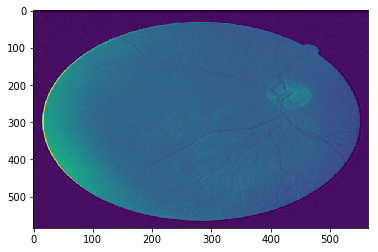

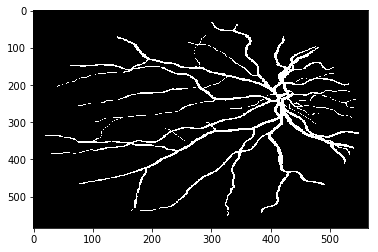

In [4]:
X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

X_data=np.array(X_data)
Y_data=np.array(Y_data)

plt.imshow(X_data[2,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.show()
plt.imshow(Y_data[2,...,], aspect="auto",cmap='gray')
plt.show()

In [5]:
#preparing data loading

#data_provider = image_util.ImageDataProvider(DATA_ROOT+"/trainData_tf/*.jpg", data_suffix="_img.jpg", mask_suffix="_mask.jpg")
#data_provider.n_class = 2

data_provider = image_util.ImageDataProvider(DATA_ROOT+"/trainData_tf2/*",data_suffix="_training.tif", mask_suffix="_mask.gif")
#data_provider.n_class = 2

#search_path = DATA_ROOT+"/trainData_tf2/*"
#data_provider = image_util.ImageDataProvider(search_path, a_min=0, a_max=255, data_suffix="_training.tif", mask_suffix="_mask.gif")
#data_provider.n_class = 2

Number of files used: 20


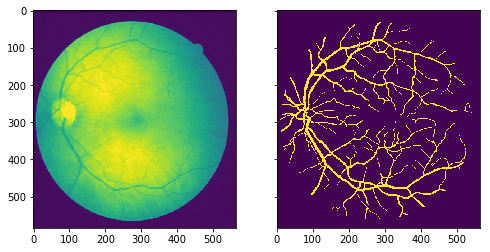

In [6]:
x_test, y_test = data_provider(4)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
plt.show()

In [7]:
print(x_test.shape)
print(y_test.shape)

print(data_provider.channels)
print(data_provider.n_class)

(4, 584, 565, 3)
(4, 584, 565, 2)
3
2


In [8]:
#setup & training

#net = unet.Unet(layers=3, features_root=64, channels=3, n_class=2)

net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="adam")

#net = unet.Unet(channels=data_provider.channels,n_class=data_provider.n_class)
#trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

#z,y=data_provider(1)


2017-10-29 16:05:34,633 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [9]:
path = trainer.train(data_provider, output_path="out", training_iters=16, epochs=3,dropout=0.5, display_step=2)


2017-10-29 16:05:43,996 Removing '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/prediction'
2017-10-29 16:05:43,998 Removing '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/out'
2017-10-29 16:05:43,999 Allocating '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/prediction'
2017-10-29 16:05:44,000 Allocating '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/out'


InvalidArgumentError: logits and labels must be same size: logits_size=[1140224,2] labels_size=[1142400,2]
	 [[Node: SoftmaxCrossEntropyWithLogits = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Reshape_31, Reshape_32)]]

Caused by op 'SoftmaxCrossEntropyWithLogits', defined at:
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-c559e33ca120>", line 5, in <module>
    net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
  File "/Users/cesare.chung/.local/lib/python3.5/site-packages/tf_unet-0.1.0-py3.5.egg/tf_unet/unet.py", line 191, in __init__
    self.cost = self._get_cost(logits, cost, cost_kwargs)
  File "/Users/cesare.chung/.local/lib/python3.5/site-packages/tf_unet-0.1.0-py3.5.egg/tf_unet/unet.py", line 229, in _get_cost
    labels=flat_labels))
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 1597, in softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 2385, in _softmax_cross_entropy_with_logits
    features=features, labels=labels, name=name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): logits and labels must be same size: logits_size=[1140224,2] labels_size=[1142400,2]
	 [[Node: SoftmaxCrossEntropyWithLogits = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Reshape_31, Reshape_32)]]
